In [18]:
import mne
import numpy as np
from mne.datasets import testing
from mne import Epochs, io, pick_types
from mne.event import define_target_events

In [19]:
print(__doc__)


Automatically created module for IPython interactive environment


In [3]:
fname="data_after_ADJUST.set"
raw = io.eeglab.read_raw_eeglab(fname,preload=False)
picks = pick_types(raw.info, eeg=True)
events = mne.find_events(raw,initial_event=True)
print (raw)

Reading data_after_ADJUST.fdt
248 events found
Event IDs: [1 5]
<RawEEGLAB  |  data_after_ADJUST.fdt, n_channels x n_times : 61 x 153970 (615.9 sec), ~151 kB, data not loaded>


In [14]:
nchan = raw.info['nchan']
nchan


61

In [4]:
iter_freqs = [
    ('Theta', 4, 7),
    ('Alpha', 8, 12),
    ('Beta', 13, 25),
    #('Gamma', 30, 45)
]

In [33]:
# set epoching parameters
event_id, tmin, tmax = 1, -1., 3.
baseline = None

frequency_map = list()
theta = io.eeglab.read_raw_eeglab(fname, preload=True)
alpha = io.eeglab.read_raw_eeglab(fname, preload=True) 
beta = io.eeglab.read_raw_eeglab(fname, preload=True)
theta.filter(4,7,fir_design='firwin')
alpha.filter(8,12,fir_design='firwin')
beta.filter(13,25,fir_design='firwin')
epoch_theta =  mne.Epochs(theta, events, event_id, tmin, tmax, baseline=baseline,
                       preload=True)
epoch_alpha =  mne.Epochs(alpha, events, event_id, tmin, tmax, baseline=baseline,
                       preload=True)
    
epoch_beta =  mne.Epochs(beta, events, event_id, tmin, tmax, baseline=baseline,
                       preload=True)
    
# for band, fmin, fmax in iter_freqs:
#     # (re)load the data to save memory
#     raw = io.eeglab.read_raw_eeglab(fname, preload=True)
#    # raw.pick_types(meg='grad', eog=True)  # we just look at gradiometers

#     # bandpass filter and compute Hilbert
#     raw.filter(fmin, fmax, n_jobs=1,  # use more jobs to speed up.
#                l_trans_bandwidth=1,  # make sure filter params are the same
#                h_trans_bandwidth=1,  # in each band and skip "auto" option.
#                fir_design='firwin')
#     raw.apply_hilbert(n_jobs=1, envelope=False)

#     epochs[i] = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=baseline,
#                        preload=True)
    
#     # remove evoked response and get analytic signal (envelope)
#     epochs[i].subtract_evoked()  # for this we need to construct new epochs.
#     epochs[i] = mne.EpochsArray(
#         data=np.abs(epochs.get_data()), info=epochs.info, tmin=epochs.tmin)
#     # now average and move on
#     frequency_map.append(((band, fmin, fmax), epochs.average()))

Reading data_after_ADJUST.fdt
Reading 0 ... 153969  =      0.000 ...   615.876 secs...
Reading data_after_ADJUST.fdt
Reading 0 ... 153969  =      0.000 ...   615.876 secs...
Reading data_after_ADJUST.fdt
Reading 0 ... 153969  =      0.000 ...   615.876 secs...
Setting up band-pass filter from 4 - 7 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 2.0 Hz
Filter length of 413 samples (1.652 sec) selected
Setting up band-pass filter from 8 - 12 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 3.0 Hz
Filter length of 413 samples (1.652 sec) selected
Setting up band-pass filter from 13 - 25 Hz
l_trans_bandwidth chosen to be 3.2 Hz
h_trans_bandwidth chosen to be 6.2 Hz
Filter length of 255 samples (1.020 sec) selected
125 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 125 events and 1001 original time points ...
1 bad epochs dropped
125 matching events found
No baseline corr

In [12]:
print(frequency_map)

[(('Theta', 4, 7), <Evoked  |  '1' (mean, N=124), [-1, 3] sec, 60 ch, ~618 kB>), (('Alpha', 8, 12), <Evoked  |  '1' (mean, N=124), [-1, 3] sec, 60 ch, ~618 kB>), (('Beta', 13, 25), <Evoked  |  '1' (mean, N=124), [-1, 3] sec, 60 ch, ~618 kB>)]


In [20]:
import matplotlib.pyplot as plt
from mne.stats import _bootstrap_ci
from mne.baseline import rescale

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


Text(0.5, 0, 'Time [ms]')

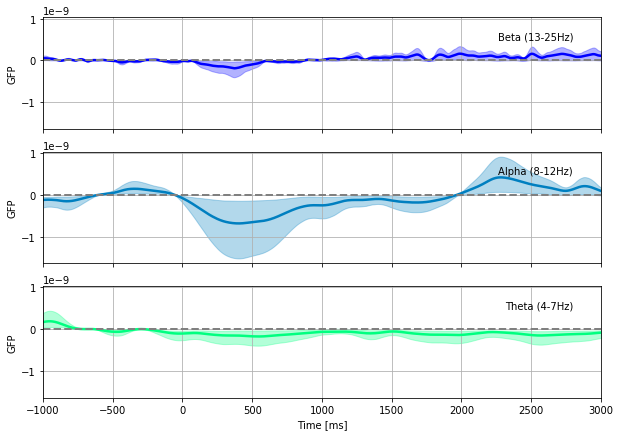

In [7]:
fig, axes = plt.subplots(3, 1, figsize=(10, 7), sharex=True, sharey=True)
colors = plt.get_cmap('winter_r')(np.linspace(0, 1, 3))
for ((freq_name, fmin, fmax), average), color, ax in zip(
        frequency_map, colors, axes.ravel()[::-1]):
    times = average.times * 1e3
    gfp = np.sum(average.data ** 2, axis=0)
    gfp = mne.baseline.rescale(gfp, times, baseline=(None, 0))
    ax.plot(times, gfp, label=freq_name, color=color, linewidth=2.5)
    ax.axhline(0, linestyle='--', color='grey', linewidth=2)
    ci_low, ci_up = _bootstrap_ci(average.data, random_state=0,
                                  stat_fun=lambda x: np.sum(x ** 2, axis=0))
    ci_low = rescale(ci_low, average.times, baseline=(None, 0))
    ci_up = rescale(ci_up, average.times, baseline=(None, 0))
    ax.fill_between(times, gfp + ci_up, gfp - ci_low, color=color, alpha=0.3)
    ax.grid(True)
    ax.set_ylabel('GFP')
    ax.annotate('%s (%d-%dHz)' % (freq_name, fmin, fmax),
                xy=(0.95, 0.8),
                horizontalalignment='right',
                xycoords='axes fraction')
    ax.set_xlim(-1000, 3000)

axes.ravel()[-1].set_xlabel('Time [ms]')

In [7]:
from mne.time_frequency import tfr_morlet, psd_multitaper,psd_welch,psd_array_welch

    using multitaper spectrum estimation with 7 DPSS windows


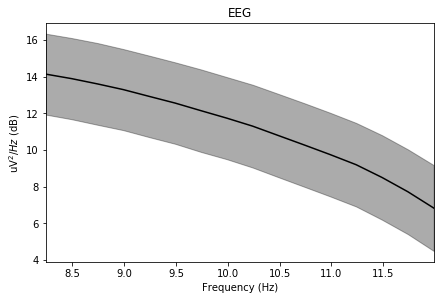

    using multitaper spectrum estimation with 7 DPSS windows


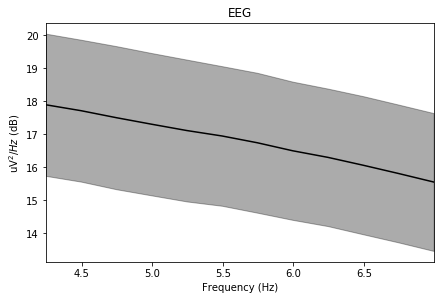

    using multitaper spectrum estimation with 7 DPSS windows


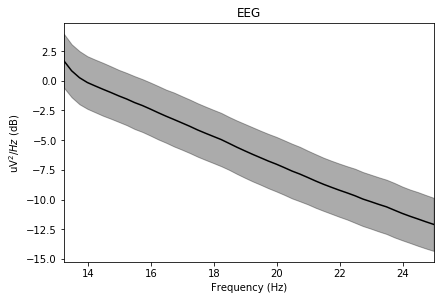

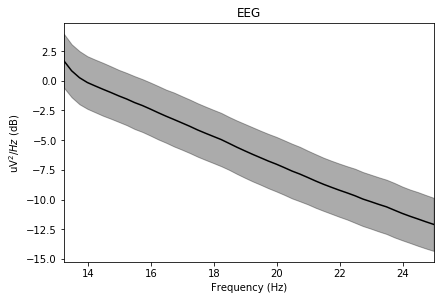

In [9]:
epochs.plot_psd(fmin=8., fmax=12.)
epochs.plot_psd(fmin=4., fmax=7.)
epochs.plot_psd(fmin=13., fmax=25.)

In [29]:
nchan = raw.info['nchan']


psds, freqs = psd_welch(raw, fmin=4., fmax=7., tmin=0,tmax=)
psds = 10. * np.log10(psds)
psds_mean = psds.mean(0).mean(0)
psds_std = psds.mean(0).std(0)



Effective window size : 1.024 (s)


C:\Users\Dell\Anaconda3\envs\mne\lib\site-packages\scipy\signal\spectral.py:1623: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


IndexError: boolean index did not match indexed array along dimension 1; dimension is 256 but corresponding boolean dimension is 129

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

# Define sampling frequency and time vector
sf = 100.
time = np.arange(data.size) / sf

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(time, data, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.xlim([time.min(), time.max()])
plt.title('N3 sleep EEG data (F3)')
sns.despine()

In [11]:
epoch = rt_client.get_data_as_epoch(n_samples=n_samples, picks=picks)
psd, freqs = psd_welch(epoch, fmin=4, fmax=7, n_fft=256)


Effective window size : 1.024 (s)


IndexError: boolean index did not match indexed array along dimension 1; dimension is 256 but corresponding boolean dimension is 129

In [22]:
fname="data_after_ADJUST.set"
raw = io.eeglab.read_raw_eeglab(fname,preload=False)
picks = pick_types(raw.info, eeg=True)
events = mne.find_events(raw,initial_event=True)

Reading data_after_ADJUST.fdt
248 events found
Event IDs: [1 5]


In [24]:
psds_theta, freqs_theta = mne.time_frequency.psd_welch(raw, picks=picks,fmin=4., fmax=7.)
psds_alpha, freqs_alpha = mne.time_frequency.psd_welch(raw, picks=picks,fmin=8., fmax=12.)
psds_beta, freqs_beta = mne.time_frequency.psd_welch(raw, picks=picks,fmin=13., fmax=25.)

Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)


In [ ]:
psds_theta = 

In [29]:
def bandpower(data, sf, band, window_sec=None, relative=False):
    """Compute the average power of the signal x in a specific frequency band.

    Parameters
    ----------
    data : 1d-array
        Input signal in the time-domain.
    sf : float
        Sampling frequency of the data.
    band : list
        Lower and upper frequencies of the band of interest.
    window_sec : float
        Length of each window in seconds.
        If None, window_sec = (1 / min(band)) * 2
    relative : boolean
        If True, return the relative power (= divided by the total power of the signal).
        If False (default), return the absolute power.

    Return
    ------
    bp : float
        Absolute or relative band power.

    Examples
    ------
    1. Absolute and relative power in the delta band
        >>> delta = bandpower(data, 100, [0.5, 4])
        >>> delta_relative = bandpower(data, 100, [0.5, 4], relative=True)

    2. Delta / beta ratio
        >>> window_sec = 4
        >>> delta = bandpower(data, 100, [0.5, 4], window_sec)
        >>> beta = bandpower(data, 100, [12, 30], window_sec)
        >>> db_ratio = delta / beta
    """
    from scipy.signal import welch
    from scipy.integrate import simps
    band = np.asarray(band)
    low, high = band

    # Compute the modified periodogram (Welch)
    if window_sec is not None:
        nperseg = window_sec * sf
    else:
        nperseg = (2 / low) * sf

    freqs, psd = welch(data, sf, nperseg=nperseg, scaling='density')

    # Find closest indices of band in frequency vector
    idx_min = np.argmax(freqs > low) - 1
    idx_max = np.argmax(freqs > high) - 1
    idx_band = np.zeros(dtype=bool, shape=freqs.shape)
    idx_band[idx_min:idx_max] = True

    # Integral approximation of the spectrum using Simpson's rule.
    bp = simps(psd[idx_band], freqs[idx_band])

    if relative:
        bp /= simps(psd, freqs)
    return bp

In [30]:
win_sec = 1.024

# Delta/beta ratio based on the absolute power
db = bandpower(raw, sf=100, [4, 7], win_sec)*bandpower(raw,sf=100,[8,12],win_sec) / bandpower(raw, sf=100, [13, 25], win_sec)

# Delta/beta ratio based on the relative power


SyntaxError: positional argument follows keyword argument (<ipython-input-30-90cc779eefbc>, line 4)